In [1]:
library(ggplot2)
options(repr.plot.height=8,repr.plot.width=8)

Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [3]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
colnames(airbnb)<-newnames

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [5]:
airbnb$MetrosCuadrados<- c(round(airbnb$PiesCuadrados*0.092903,2))

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [6]:
length(airbnb$CodigoPostal)
airbnb$CodigoPostal

[1] 13207

[1] 28004        28004        28004        28004        28015       
    [6] 28004        28004        28004        28015        28004       
   [11] 28004        28004        28013        28005        28013       
   [16] 28013        28013        28012        28013        28013       
   [21] 28013        28005        28013        28012        28012       
   [26] 28013        28014        28013        28012        28005       
   [31] 28005        28005        28005        28012        28005       
   [36] 28005        28045        28005        28005        28005       
   [41] 28005        28005        28013        28013        28013       
   [46] 28013        28013        28012        28013        28012       
   [51] 28013        28013        28013        28012        28013       
   [56] 28013        28012        27013                     28045       
   [61] 28045        28045        28045        28045        28045       
   [66] 28045        28045        28045        28045        28045       
   [71] 28045        28012        28045        28045        28045       
   [76] 28045        28012        28012        28012        28012       
   [81] 28005        28012                     28005        28012       
   [86] 28012        28012        28012        28012        28005       
   [91] 28012        28005        28005        28012        28005       
   [96] 28012        28012        28005        28005        28005       
  [101] 28012        28012        28005        28012        28014       
  [106] 28014        28014        28014        28012        28014       
  [111] 28014        28014        28012        28014        28014       
  [116] 28014        28014        28014        28012        28012       
  [121] 28014        28012        28012        28005        28012       
  [126] 28012        28012        28012        28012        28005       
  [131] 28005                     28012                     28012       
  [136] 28012        28012        28005        28012        28012       
  [141] 28014        28014        28045        28045        28045       
  [146] 28045        28007        28007        28007        28007       
  [151] 28007        28007        28028        28009        28009       
  [156] 28009        28009        28014        28014        28007       
  [161] 28005        28013        28005        28005        28013       
  [166] 28013        28013        28005        28013        28013       
  [171] 28005        28005        28005        28013        28013       
  [176] 28013        28005        28013        28005        28013       
  [181] 28013        28005        28013        28005        28013       
  [186] 28013        28005        28005        28013        28013       
  [191] 28005        28013        28005        28013        28005       
  [196] 28013        28005        28005        28005        28005       
  [201] 28005        28013        28005        28005        28005       
  [206] 28013        28013        28012        28005        28012       
  [211] 28005        28012        28005        28012        28012       
  [216] 28005        28012        28005        28012        28012       
  [221] 28012        28012        28012        28012        28012       
  [226] 28012        28012        28013        28013        28014       
  [231] 28012        28012        28012        28005        28005       
  [236] 28005        28012        28012        28005        28012       
  [241] 28012        28012        28012        28012        28012       
  [246] 28012        28014        28014        28014        28014       
  [251] 28012        28014        28014        28014        28014       
  [256] 28004        28004        28004        28004        28004       
  [261] 28004        28004        28004        28004        28004       
  [266] 28001        28001        28006        28001        28001       
  [271] 28001        28001        28001        28001        28

In [7]:
airbnb$CodigoPostal[airbnb$CodigoPostal == '']<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal == '-']<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal == '28']<-NA


airbnb$CodigoPostal[airbnb$CodigoPostal == '280013']<-'28013'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2015']<-'28015'
airbnb$CodigoPostal[airbnb$CodigoPostal == '28002\n28002']<-'28002'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2804']<-'28004'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2805']<-'28005'
airbnb$CodigoPostal[airbnb$CodigoPostal == '28051\n28051']<-'28051'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2815']<-'28015'
airbnb$CodigoPostal[airbnb$CodigoPostal == 'Madrid 28004']<-'28004'

airbnb$CodigoPostal[!grepl("^28",airbnb$CodigoPostal)]<-NA

airbnb$CodigoPostal<-factor(airbnb$CodigoPostal)
summary(airbnb$CodigoPostal)

28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 28013 
  231   171   185  1796  1195   218   206   338   216   384   250  2060  1020 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   602    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 
   16    63    90   103    19   495    32    67     1     3    58    17     1 
28053 28054 28055 28056 28058 28060 28094 28105 28850  NA's 
   85    12    12     1     1     1     1     1     1   446

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [8]:
length(unique(airbnb$CodigoPostal))

[1] 62

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [9]:
print("Los 5 códigos postales con más entradas son:")
head(sort(table(airbnb$CodigoPostal),decreasing = T),5)

[1] "Los 5 códigos postales con más entradas son:"



28012 28004 28005 28013 28014 
 2060  1796  1195  1020   630 

In [10]:
print("Los 5 códigos postales con menos entradas son:")
head(sort(table(airbnb$CodigoPostal),decreasing = F),5)

[1] "Los 5 códigos postales con menos entradas son:"



28048 28052 28056 28058 28060 
    1     1     1     1     1 

¿Cuales son los barrios que hay en el código postal 28012?

In [11]:
unique(airbnb[which(airbnb$CodigoPostal=='28012'),]$Barrio)

[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postao 28012? Asumiendo que el identificador de Barrio sea correcto, ¿es fiable la columna de código postal?

In [12]:
airbnb_28012<-airbnb[which(airbnb$CodigoPostal=='28012'),]
airbnb_28012$Barrio<-factor(airbnb_28012$Barrio)
table(airbnb_28012$Barrio)


        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

Podemos indicar que la columna 'Codigo Postal' parace fiable.

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [13]:
length(unique(airbnb$Barrio))
levels(airbnb$Barrio)

[1] 125

[1] "Abrantes"                     "Acacias"                     
  [3] "Adelfas"                      "Aeropuerto"                  
  [5] "Aguilas"                      "Alameda de Osuna"            
  [7] "Almagro"                      "Almenara"                    
  [9] "Almendrales"                  "Aluche"                      
 [11] "Ambroz"                       "Amposta"                     
 [13] "Apostol Santiago"             "Arapiles"                    
 [15] "Aravaca"                      "Arcos"                       
 [17] "Argüelles"                    "Atocha"                      
 [19] "Bellas Vistas"                "Berruguete"                  
 [21] "Buenavista"                   "Butarque"                    
 [23] "Campamento"                   "Canillas"                    
 [25] "Canillejas"                   "Cármenes"                    
 [27] "Casa de Campo"                "Casco Histórico de Barajas"  
 [29] "Casco Histórico de Vallecas"  "Casco Histórico de Vicálvaro"
 [31] "Castellana"                   "Castilla"                    
 [33] "Castillejos"                  "Chopera"                     
 [35] "Ciudad Jardín"                "Ciudad Universitaria"        
 [37] "Colina"                       "Comillas"                    
 [39] "Concepción"                   "Corralejos"                  
 [41] "Cortes"                       "Costillares"                 
 [43] "Cuatro Caminos"               "Cuatro Vientos"              
 [45] "Delicias"                     "El Goloso"                   
 [47] "El Plantío"                   "El Viso"                     
 [49] "Embajadores"                  "Entrevías"                   
 [51] "Estrella"                     "Fontarrón"                   
 [53] "Fuente del Berro"             "Fuentelareina"               
 [55] "Gaztambide"                   "Goya"                        
 [57] "Guindalera"                   "Hellín"                      
 [59] "Hispanoamérica"               "Ibiza"                       
 [61] "Imperial"                     "Jerónimos"                   
 [63] "Justicia"                     "La Paz"                      
 [65] "Legazpi"                      "Lista"                       
 [67] "Los Angeles"                  "Los Rosales"                 
 [69] "Lucero"                       "Marroquina"                  
 [71] "Media Legua"                  "Mirasierra"                  
 [73] "Moscardó"                     "Niño Jesús"                  
 [75] "Nueva España"                 "Numancia"                    
 [77] "Opañel"                       "Orcasitas"                   
 [79] "Orcasur"                      "Pacífico"                    
 [81] "Palacio"                      "Palomas"                     
 [83] "Palomeras Bajas"              "Palomeras Sureste"           
 [85] "Palos de Moguer"              "Pavones"                     
 [87] "Peñagrande"                   "Pilar"                       
 [89] "Pinar del Rey"                "Piovera"                     
 [91] "Portazgo"                     "Pradolongo"                  
 [93] "Prosperidad"                  "Pueblo Nuevo"                
 [95] "Puerta Bonita"                "Puerta del Angel"            
 [97] "Quintana"                     "Recoletos"                   
 [99] "Rejas"                        "Rios Rosas"                  
[101] "Rosas"                        "Salvador"                    
[103] "San Andrés"                   "San Cristobal"               
[105] "San Diego"                    "San Fermín"                  
[107] "San Isidro"                   "San Juan Bautista"           
[109] "San Pascual"                  "Santa Eugenia"               
[111] "Simancas"                     "Sol"                         
[113] "Timón"                        "Trafalgar"                   
[115] "Universidad"                  "Valdeacederas"               
[117] "Valdefuentes"                 "Valdemarín"         

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [14]:
head(sort(table(airbnb$Barrio),decreasing = T),5)


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [15]:
length(unique(airbnb$TipoAlquiler))
table(airbnb$TipoAlquiler)

[1] 3


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


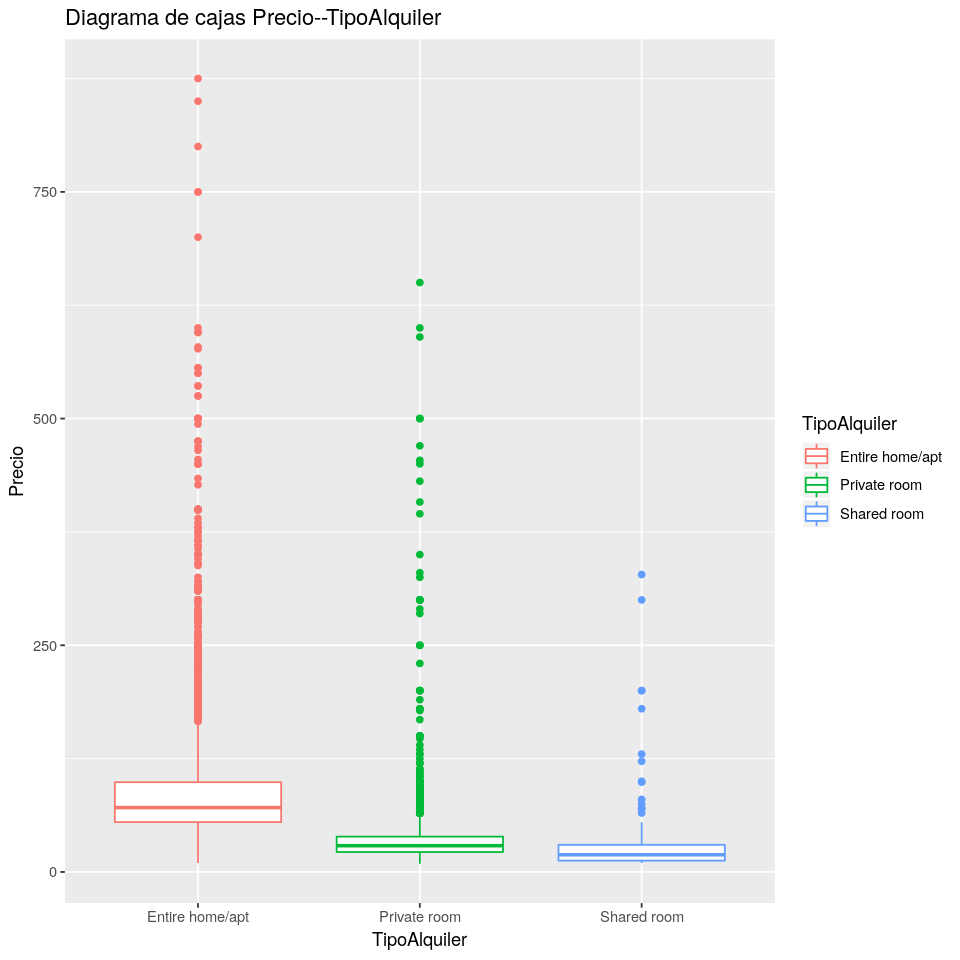

In [16]:
library(ggplot2)
ggplot(airbnb,aes(y=Precio,x=TipoAlquiler,color=TipoAlquiler))+geom_boxplot()+
  ggtitle('Diagrama de cajas Precio--TipoAlquiler')

Cual es el precio medio de alquiler medio de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [17]:
#Averiguamos el precio medio por tipo de alquiler y calculamos su pvalor con un test de shapiro,
#despues al no seguir una distribucion gaussiano comprobamos con kruskal.

for (i in levels(airbnb$TipoAlquiler)){
    df<-subset(airbnb,TipoAlquiler==i)
    print(paste("Tipo de alquiler:",i," , precio medio= ",mean(df$Precio,na.rm=T)))
    if (nrow(df)>5000){
        df<-df[1:5000,]
    }
    
    sp<-shapiro.test(df$Precio)
    print(paste("pvalor Shapiro = ",sp$p.value))
}

kt<-kruskal.test(Precio~TipoAlquiler,airbnb)

paste("pvalor Kruskal=",kt$p.value)

[1] "Tipo de alquiler: Entire home/apt  , precio medio=  87.2966058763931"
[1] "pvalor Shapiro =  1.24077898621874e-72"
[1] "Tipo de alquiler: Private room  , precio medio=  34.255135981217"
[1] "pvalor Shapiro =  9.18974842339072e-85"
[1] "Tipo de alquiler: Shared room  , precio medio=  29.8534031413613"
[1] "pvalor Shapiro =  4.51672121600842e-24"


[1] "pvalor Kruskal= 0"

La diferencia si es significativa, las medidas son distintas estadisticamente.

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [18]:
airbnb_entire<-subset(airbnb,TipoAlquiler=='Entire home/apt')

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire

In [19]:
head(sort(table(airbnb_entire$Barrio),decreasing = T),5)


Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [20]:
mean_price<-aggregate(. ~ Barrio, airbnb_entire[c("Barrio","Precio")], mean,na.rm=TRUE)
dim(mean_price)

mean_price<-mean_price[order(mean_price$Precio,decreasing = T),]
head(mean_price,5)
barrios<-head(mean_price,5)$Barrio

[1] 119   2

,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [21]:
data_Barrio_Freq<-data.frame(table(airbnb_entire$Barrio))
colnames(data_Barrio_Freq)<-c("Barrio","Freq")
mean_price_BF5<-merge(data_Barrio_Freq,mean_price,by="Barrio")

mean_price_BF5<-mean_price_BF5[order(mean_price_BF5$Precio,decreasing = T),]
head(mean_price_BF5,5)

,Barrio,Freq,Precio
,<fct>,<int>,<dbl>
77,Palomas,4,309.7500
50,Fuentelareina,2,180.0000
93,Recoletos,135,161.9254
43,El Plantío,1,150.0000
30,Castellana,73,141.3889


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [22]:
mean_price_100<-subset(mean_price_BF5,mean_price_BF5$Freq>100)

head(mean_price_100,5)
barrios<-head(mean_price_100,5)$Barrio

,Barrio,Freq,Precio
,<fct>,<int>,<dbl>
93,Recoletos,135,161.92537
52,Goya,142,111.33803
106,Sol,701,100.75036
108,Trafalgar,223,98.57848
59,Justicia,534,98.25468


Dibuja el diagrama de densidad de distribución de los diferentes precios

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”
Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


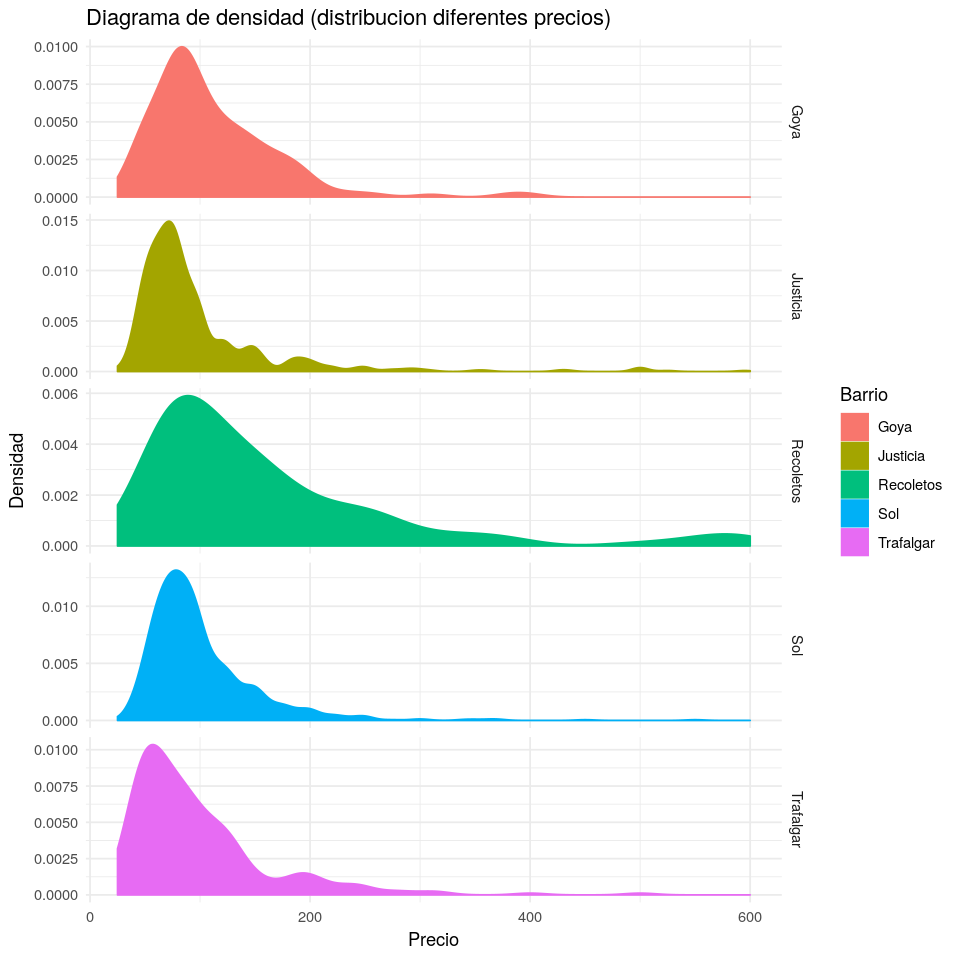

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


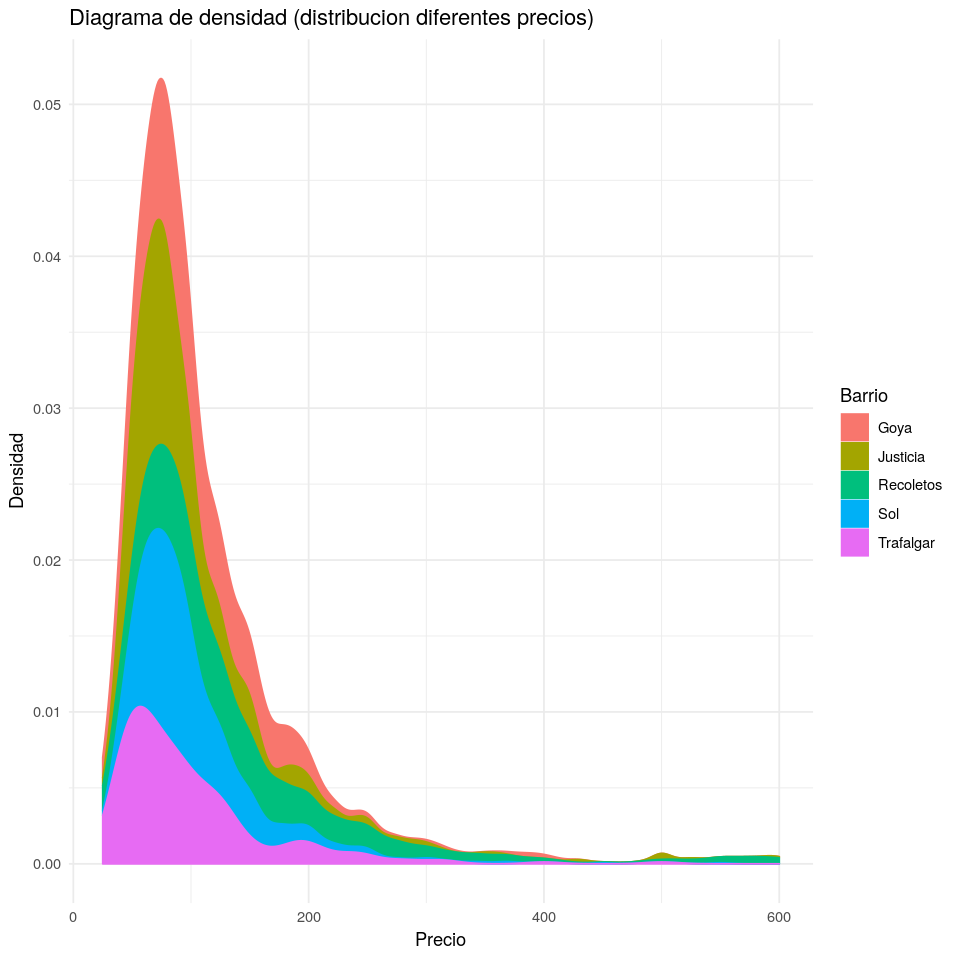

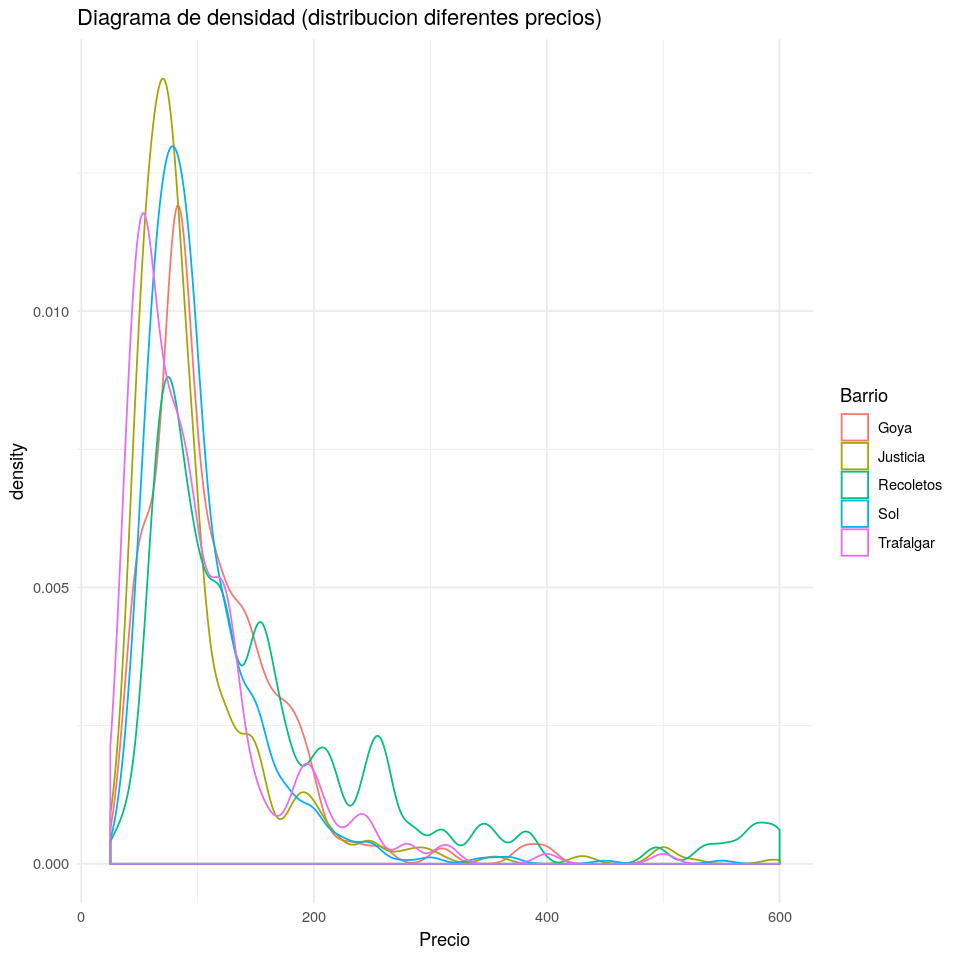

In [23]:
df_dens_barrios<-subset(airbnb_entire,Barrio %in% barrios)
ggplot(df_dens_barrios,aes(x=Precio,color=Barrio)) + 
  geom_density(aes(x = Precio, fill = Barrio), position = 'stack') + 
  facet_grid(Barrio~., scales = 'free') +
  xlab("Precio") + 
  ylab("Densidad") + 
  ggtitle("Diagrama de densidad (distribucion diferentes precios)") +
  theme_minimal()

ggplot(df_dens_barrios,aes(x=Precio,color=Barrio)) + 
  geom_density(aes(x = Precio, fill = Barrio), position = 'stack') + 
  xlab("Precio") + 
  ylab("Densidad") + 
  ggtitle("Diagrama de densidad (distribucion diferentes precios)") +
  theme_minimal()

ggplot(df_dens_barrios,aes(x=Precio,color=Barrio))+geom_density(bw=10)+ 
  ggtitle("Diagrama de densidad (distribucion diferentes precios)") +
  theme_minimal()

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [24]:
mean_size<-aggregate(. ~ Barrio, airbnb_entire[c("Barrio","MetrosCuadrados")], mean,na.rm=TRUE)
mean_price_size_100<-merge(mean_price_100,mean_size,by="Barrio")

mean_price_size_100<-mean_price_size_100[order(mean_price_size_100$Precio,decreasing = T),]
head(mean_price_size_100,5)

,Barrio,Freq,Precio,MetrosCuadrados
,<fct>,<int>,<dbl>,<dbl>
8,Recoletos,135,161.92537,26.66333
4,Goya,142,111.33803,51.68333
9,Sol,701,100.75036,45.61750
10,Trafalgar,223,98.57848,29.30429
5,Justicia,534,98.25468,28.52706


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos

Warning message:
“Removed 1645 rows containing non-finite values (stat_density).”
Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


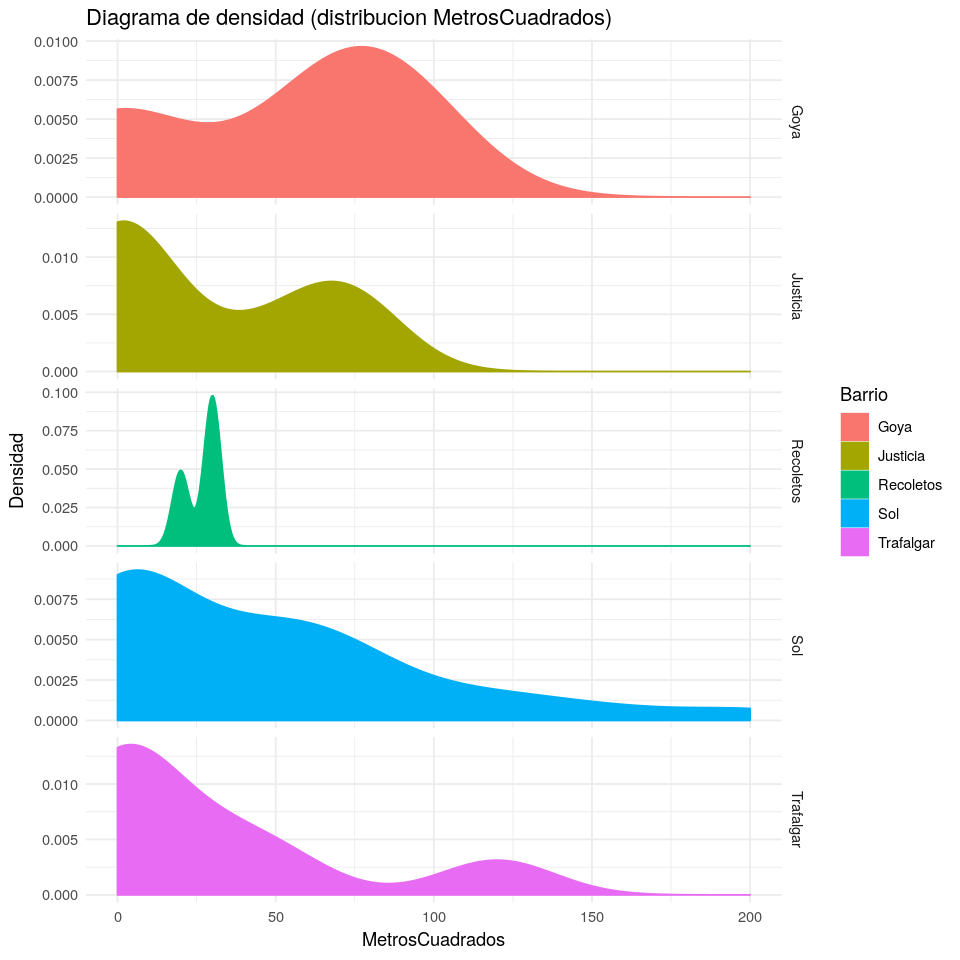

Warning message:
“Removed 1645 rows containing non-finite values (stat_density).”


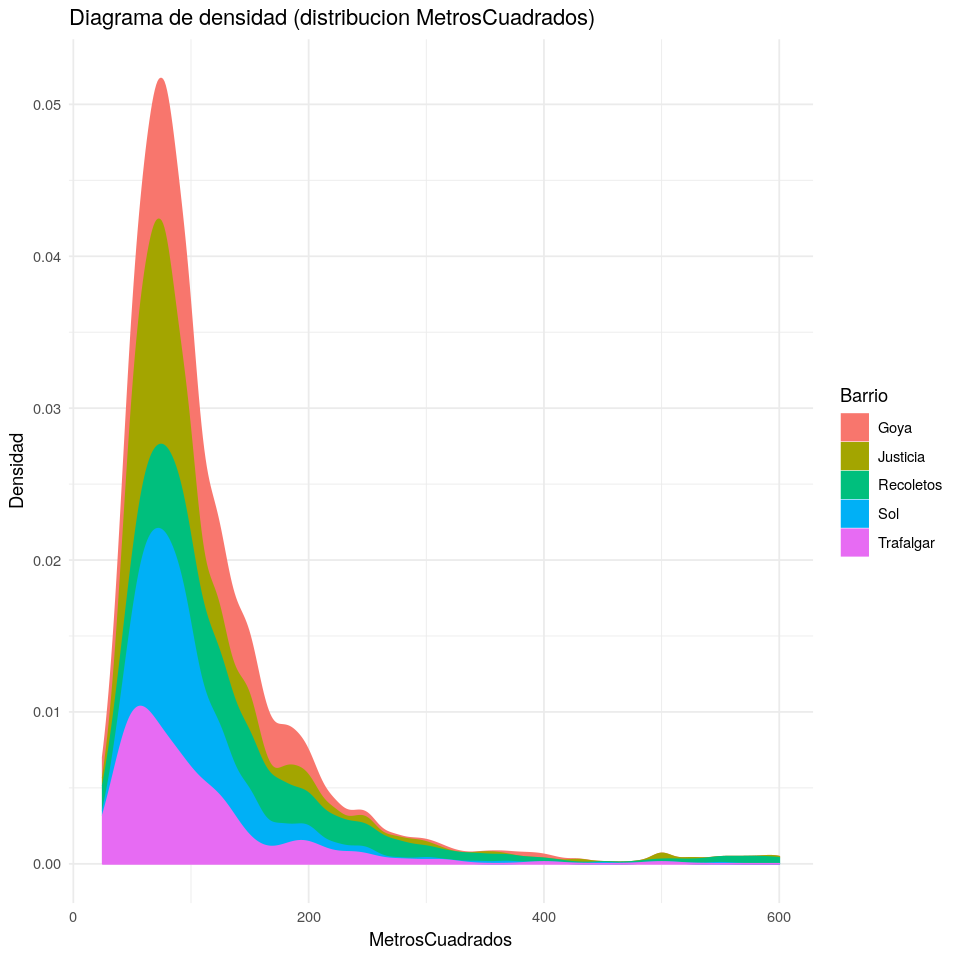

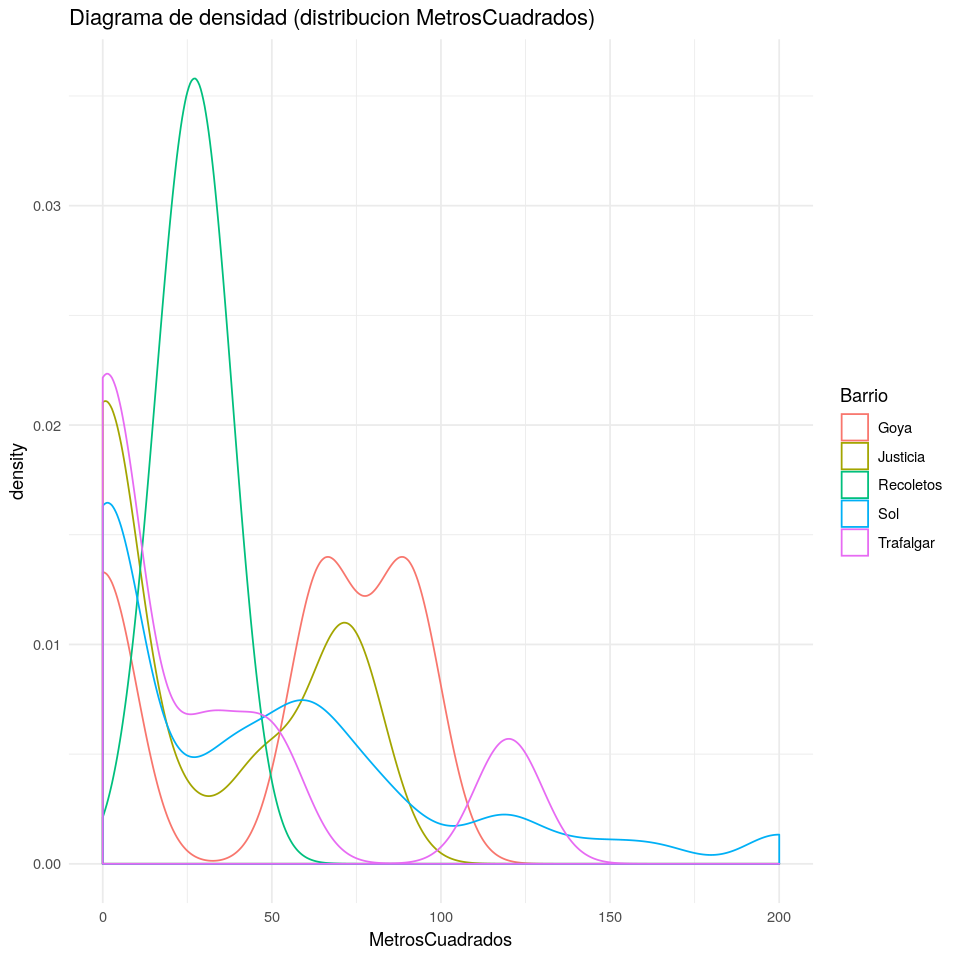

In [25]:
df_dens_barrios<-subset(airbnb_entire,Barrio %in% barrios)

ggplot(df_dens_barrios,aes(x=Precio,color=Barrio)) + 
  geom_density(aes(x = MetrosCuadrados, fill = Barrio), position = 'stack') + 
  facet_grid(Barrio~., scales = 'free') +
  xlab("MetrosCuadrados") + 
  ylab("Densidad") + 
  ggtitle("Diagrama de densidad (distribucion MetrosCuadrados)") +
  theme_minimal()

ggplot(df_dens_barrios,aes(x=MetrosCuadrados,color=Barrio)) + 
  geom_density(aes(x = Precio, fill = Barrio), position = 'stack') + 
  xlab("MetrosCuadrados") + 
  ylab("Densidad") + 
  ggtitle("Diagrama de densidad (distribucion MetrosCuadrados)") +
  theme_minimal()

ggplot(df_dens_barrios,aes(x=MetrosCuadrados,color=Barrio))+geom_density(bw=10)+ 
  ggtitle("Diagrama de densidad (distribucion MetrosCuadrados)") +
  theme_minimal()

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [26]:
#Tendriamos que usar tambien el test de Kruskal, ocurre como en el test anterior.

for (barrio in unique(df_dens_barrios$Barrio)){
    df<-df_dens_barrios[which(df_dens_barrios$Barrio==as.character(barrio)),]
    print(paste("Precio medio para el barrio:",barrio," = ",mean(df$MetrosCuadrados,na.rm=T)))
    if (nrow(df)>5000){
        df<-df[1:5000,]
    }
    sp<-shapiro.test(df$Precio)
    print(paste("pvalor Shapiro =",sp$p.value))
}

kt<-kruskal.test(MetrosCuadrados~Barrio,df_dens_barrios)
kt

[1] "Precio medio para el barrio: Sol  =  45.6175"
[1] "pvalor Shapiro = 6.82296081876145e-30"
[1] "Precio medio para el barrio: Justicia  =  28.5270588235294"
[1] "pvalor Shapiro = 6.68576869862315e-32"
[1] "Precio medio para el barrio: Recoletos  =  26.6633333333333"
[1] "pvalor Shapiro = 2.80034621674868e-13"
[1] "Precio medio para el barrio: Goya  =  51.6833333333333"
[1] "pvalor Shapiro = 2.76797989326578e-11"
[1] "Precio medio para el barrio: Trafalgar  =  29.3042857142857"
[1] "pvalor Shapiro = 5.98924729847284e-17"



	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574


Al resultado del test no podemos decir que son estadisticamente diferentes.

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [27]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
nrow(barrio_sol)

[1] 701

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [28]:
v <- cor(barrio_sol[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados")],use="pairwise.complete.obs")
v

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6761906,0.6578162,0.4820403
NumDormitorios,0.6761906,1.0000000,0.7594598,0.5684425
MaxOcupantes,0.6578162,0.7594598,1.0000000,0.4286106
MetrosCuadrados,0.4820403,0.5684425,0.4286106,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
“Removed 641 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


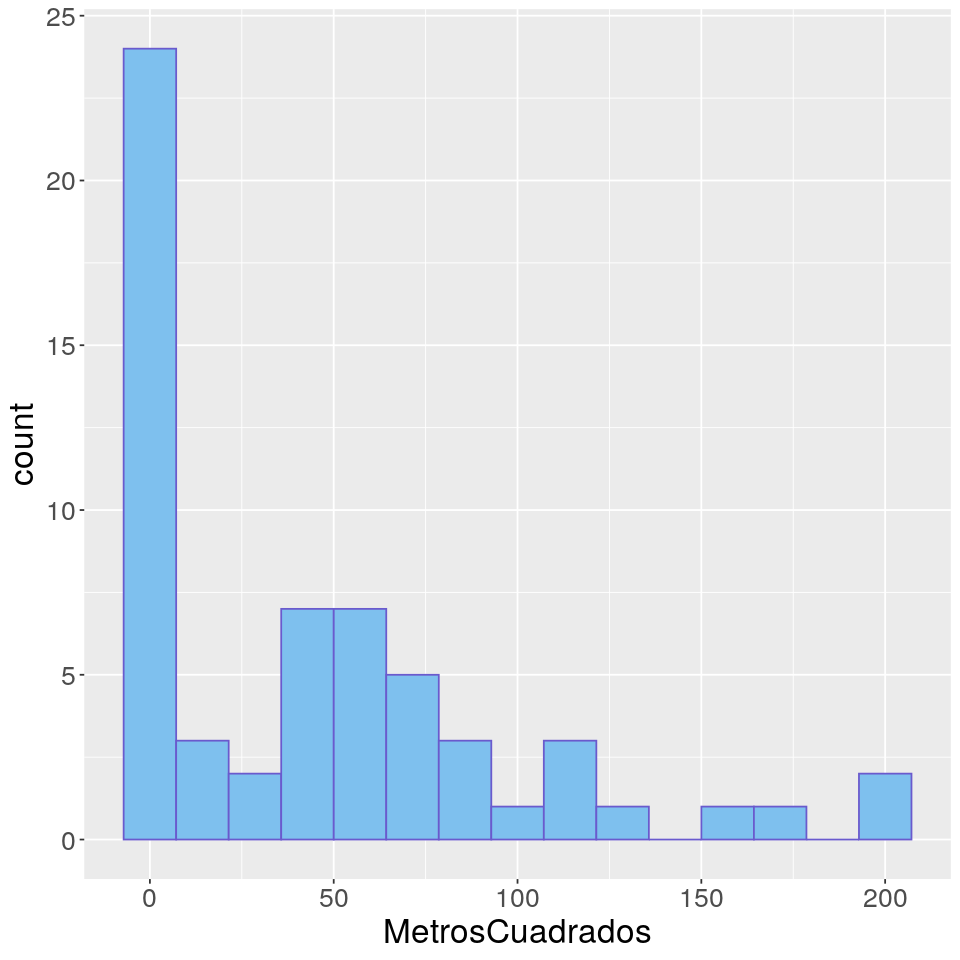

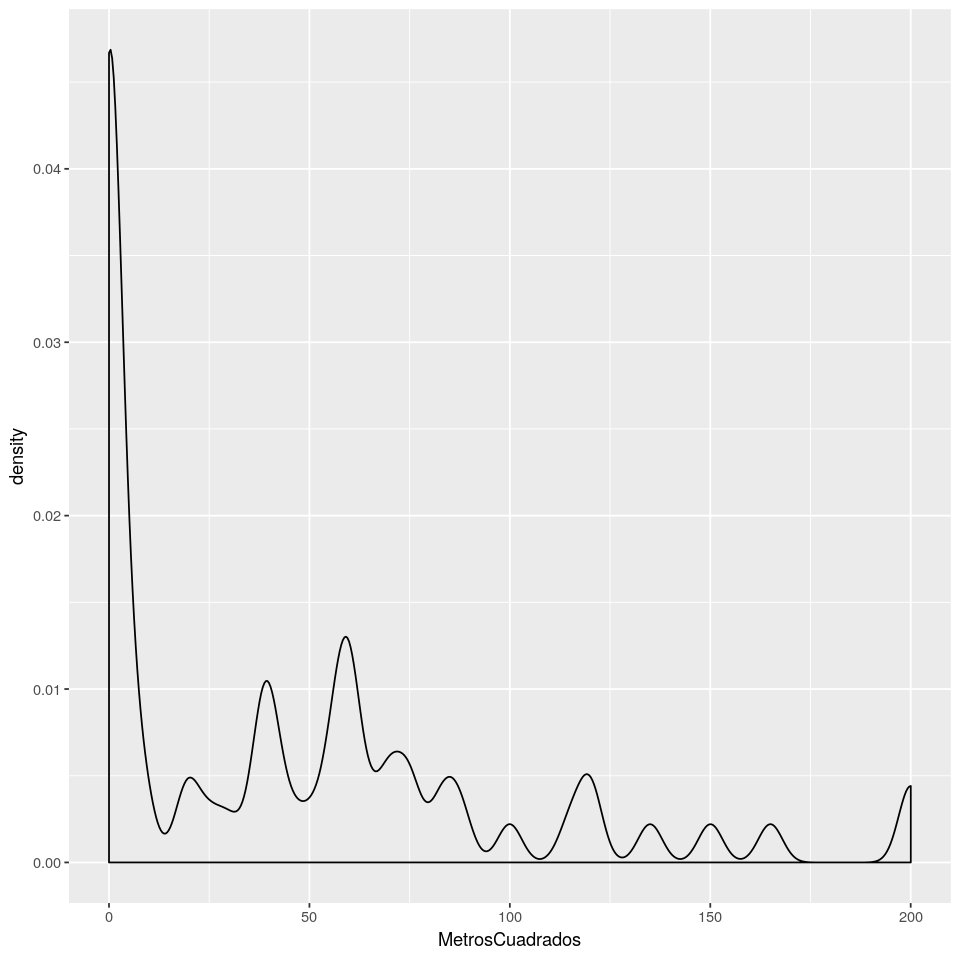

In [29]:
ggplot(data=barrio_sol,aes(x=barrio_sol$MetrosCuadrados))+
   theme(tex=element_text(size=20))+
   geom_histogram(bins=15,fill='skyblue2',color="slateblue")+
   xlab("MetrosCuadrados")
ggplot(barrio_sol,aes(x=MetrosCuadrados))+geom_density(bw=3)

A la vista de estos resultados podemos descartar los pisos que tengan menos de 15 m2 al poder tratarse de algun error.

In [30]:
barrio_sol<-subset(barrio_sol, MetrosCuadrados>15)
nrow(barrio_sol)

[1] 35

In [31]:
#Una vez realizado este estudio procedemos a calcular nuevamente la matriz de correlacion
barrio_sol<-subset(airbnb_entire,Barrio=="Sol" & MetrosCuadrados>15)
cor(barrio_sol[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados")],use="pairwise.complete.obs")

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.7292599,0.8589205,0.6112905
NumDormitorios,0.7292599,1.0000000,0.7855310,0.8214959
MaxOcupantes,0.8589205,0.7855310,1.0000000,0.7120924
MetrosCuadrados,0.6112905,0.8214959,0.7120924,1.0000000


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [32]:
model<-lm(barrio_sol,formula=Precio~NumBanyos+NumDormitorios+MetrosCuadrados+MaxOcupantes)
summary(model)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MetrosCuadrados + 
    MaxOcupantes, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.853 -13.673  -5.048  18.523  69.472 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      28.0360    12.9586   2.164  0.03859 * 
NumBanyos         0.5648    14.6039   0.039  0.96941   
NumDormitorios   28.2124     8.5440   3.302  0.00249 **
MetrosCuadrados   0.2237     0.2050   1.091  0.28397   
MaxOcupantes      2.6739     4.4329   0.603  0.55091   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.32 on 30 degrees of freedom
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7267 
F-statistic:  23.6 on 4 and 30 DF,  p-value: 6.728e-09


In [33]:
step(object = model, direction ='both', trace = 1)

Start:  AIC=245.7
Precio ~ NumBanyos + NumDormitorios + MetrosCuadrados + MaxOcupantes

                  Df Sum of Sq   RSS    AIC
- NumBanyos        1       1.5 29428 243.70
- MaxOcupantes     1     356.9 29784 244.12
- MetrosCuadrados  1    1167.5 30594 245.06
<none>                         29427 245.70
- NumDormitorios   1   10694.9 40122 254.55

Step:  AIC=243.7
Precio ~ NumDormitorios + MetrosCuadrados + MaxOcupantes

                  Df Sum of Sq   RSS    AIC
- MaxOcupantes     1     727.5 30156 242.56
- MetrosCuadrados  1    1177.4 30606 243.08
<none>                         29428 243.70
+ NumBanyos        1       1.5 29427 245.70
- NumDormitorios   1   11278.2 40706 253.06

Step:  AIC=242.56
Precio ~ NumDormitorios + MetrosCuadrados

                  Df Sum of Sq   RSS    AIC
- MetrosCuadrados  1    1611.5 31767 242.38
<none>                         30156 242.56
+ MaxOcupantes     1     727.5 29428 243.70
+ NumBanyos        1     372.1 29784 244.12
- NumDormitorios   1   191


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol)

Coefficients:
   (Intercept)  NumDormitorios  
         41.28           39.48  


In [34]:
model<-lm(barrio_sol,formula=Precio~NumDormitorios+MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.703 -15.056  -4.442  17.343  68.123 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      34.0919    10.0932   3.378  0.00193 ** 
NumDormitorios   31.8827     7.0760   4.506  8.3e-05 ***
MetrosCuadrados   0.2557     0.1956   1.308  0.20029    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.7 on 32 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7374 
F-statistic: 48.74 on 2 and 32 DF,  p-value: 1.939e-10


In [35]:
model<-lm(barrio_sol,formula=Precio~NumDormitorios)
summary(model)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.704 -17.010  -5.768  19.490  61.296 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      41.283      8.554   4.826 3.08e-05 ***
NumDormitorios   39.484      4.078   9.682 3.61e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.03 on 33 degrees of freedom
Multiple R-squared:  0.7396,	Adjusted R-squared:  0.7317 
F-statistic: 93.75 on 1 and 33 DF,  p-value: 3.611e-11


In [36]:
model<-lm(barrio_sol,formula=Precio~MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.155 -18.407  -0.141   9.145 122.102 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      30.9152    12.6756   2.439   0.0203 *  
MetrosCuadrados   0.9796     0.1404   6.978  5.6e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.65 on 33 degrees of freedom
Multiple R-squared:  0.596,	Adjusted R-squared:  0.5838 
F-statistic: 48.69 on 1 and 33 DF,  p-value: 5.601e-08


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

La variable mas fiable es NumDormitorios tiene un R^2 mas elevado.

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [37]:
model<-lm(barrio_sol,formula=Precio~MetrosCuadrados)
confint(model)["MetrosCuadrados",]

2.5 %    97.5 % 
0.6940008 1.2652478

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [38]:
model<-lm(barrio_sol,formula=Precio~NumDormitorios)
confint(model)["NumDormitorios",]

2.5 %   97.5 % 
31.18746 47.78095

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

In [39]:
#Calculamos con la condicion dada y dividimos entre el total de los apartamentos para poder calcular la probabilidad.

sol_num3dormitorios<-sum(barrio_sol$NumDormitorios==3)
numTotal<-nrow(barrio_sol)
print(paste("La probabilidad de encontrar un piso de dichas caracteristicas es de un:",sol_num3dormitorios/numTotal))
print("El margen de error es:")
binom.test(sol_num3dormitorios,numTotal)$conf

[1] "La probabilidad de encontrar un piso de dichas caracteristicas es de un: 0.0857142857142857"
[1] "El margen de error es:"


[1] 0.01803764 0.23057502
attr(,"conf.level")
[1] 0.95